In [1]:
#import necesary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_data(path):
    return pd.read_csv(path)

In [3]:
!ls

Fraud Detection.ipynb
creditcard.csv
creditcard.csv.zip
creditcardfraud
creditcardfraud.zip


In [4]:
credit=load_data("creditcard.csv")

In [5]:
#head of dataset
credit.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#shape of dataset
credit.shape

(284807, 31)

In [7]:
#check the info of dataset
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# description of dataset
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# EDA Part

In [9]:
credit.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

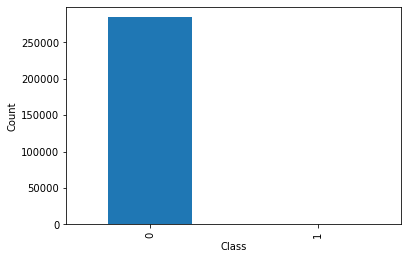

In [11]:
credit['Class'].value_counts().plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

from above plot we can analyze that 492 are fraud out of 284807 customers.So we can say that data is imbalanced data.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


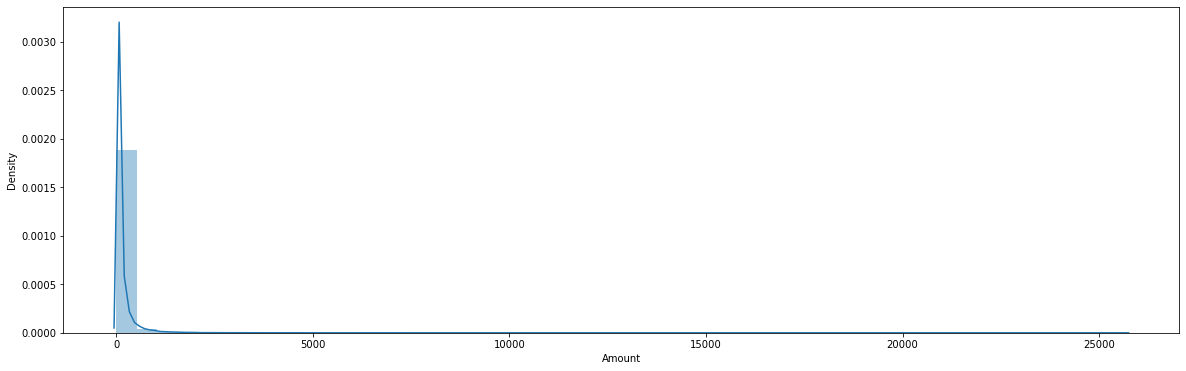

In [12]:
plt.figure(figsize=(20,6))
sns.distplot(credit['Amount'])
plt.show()

we cannt analyze more from this plot, we need to do sampling for this features. but before that we need to analyse what are distribution of amount according to class(fraud or not)

In [13]:
normal=credit[credit['Class']==0]
fraud=credit[credit['Class']==1]

In [14]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

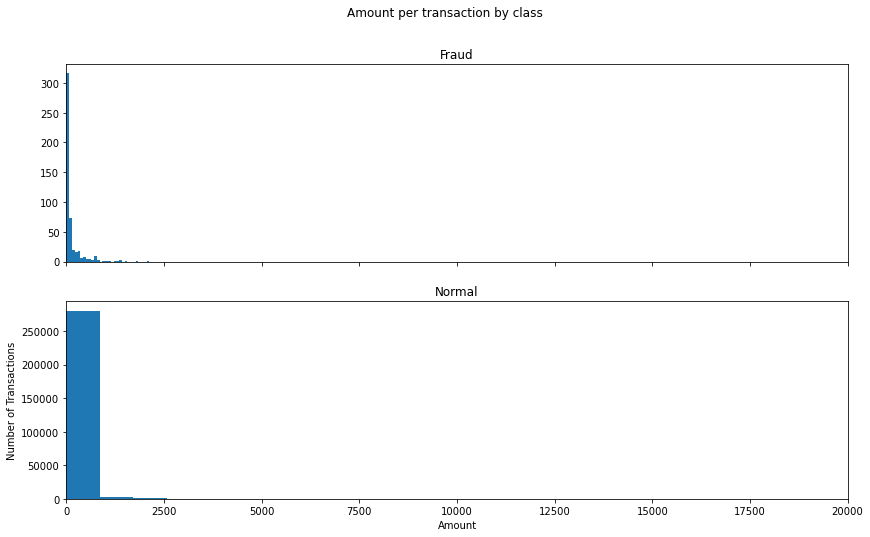

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
ax1.hist('Amount',data=fraud, bins = 30)
ax1.set_title('Fraud')
ax2.hist('Amount', data=normal, bins = 30)
ax2.set_title('Normal')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.show()

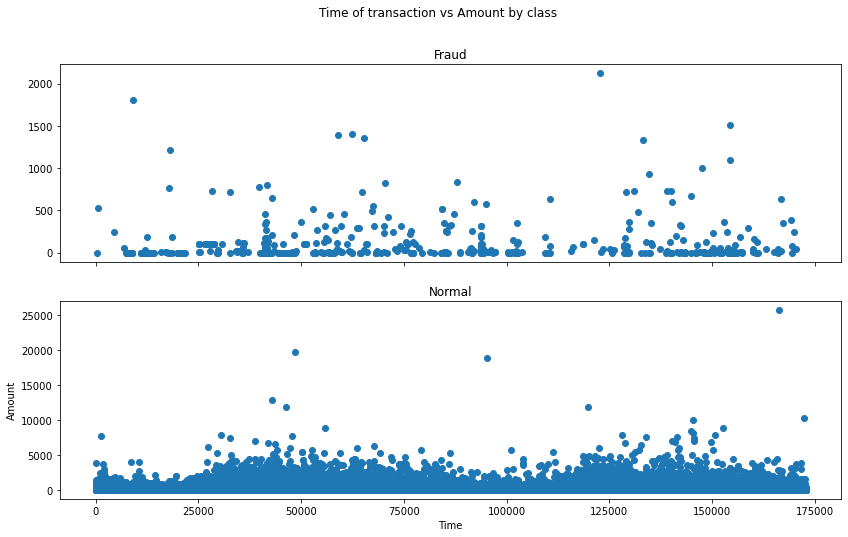

In [17]:

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter('Time', 'Amount', data=fraud)
ax1.set_title('Fraud')
ax2.scatter('Time', 'Amount', data=normal)
ax2.set_title('Normal')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

we can analyse that in certain time period fraudelunt transaction occurs and sometimes it is high in amount and sometime it is low

In [18]:
def make_bins(feature, size=60):
    bins = np.linspace(feature.min(), feature.max(), num=size)

    bin_labels = []
    bins_last_index = bins.shape[0] - 1

    for id, val in enumerate(bins):
        if id == bins_last_index:
            continue
        val_to_put = str(int(bins[id])) + ' - ' + str(int(bins[id + 1]))
        bin_labels.append(val_to_put)
    
    return bins, bin_labels

In [19]:
bins, labels=make_bins(credit['Amount'], size=10)

In [20]:
credit['Amount_bins'] = pd.cut(credit['Amount'], bins=bins,
                           labels=labels, include_lowest=True)
credit['Amount_bins'].head().to_frame()

,Amount_bins
0,0 - 2854
1,0 - 2854
2,0 - 2854
3,0 - 2854
4,0 - 2854


In [21]:
credit['Amount_bins'].value_counts()

0 - 2854         284484
2854 - 5709         285
5709 - 8563          28
8563 - 11418          4
11418 - 14272         3
17127 - 19982         2
22836 - 25691         1
19982 - 22836         0
14272 - 17127         0
Name: Amount_bins, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

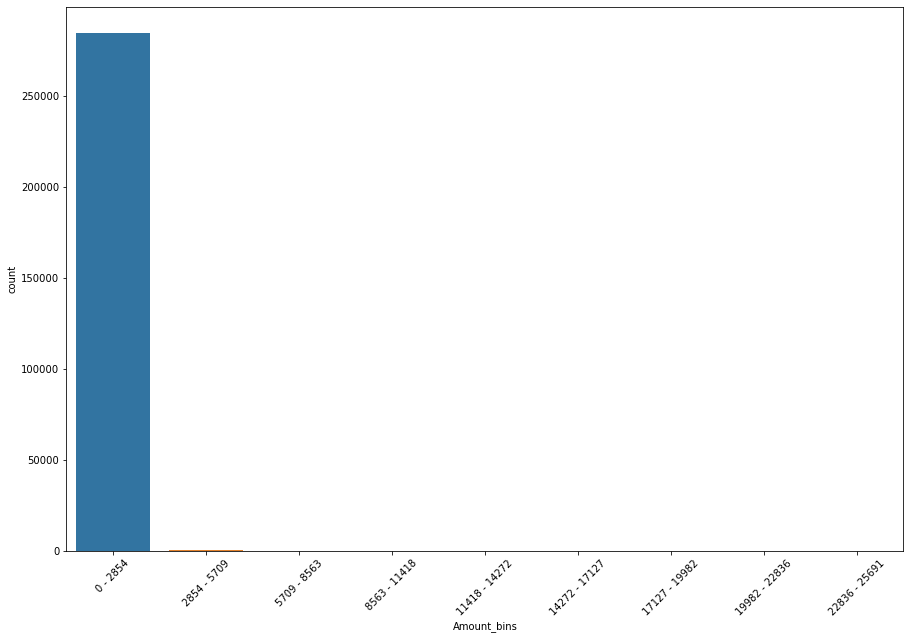

In [22]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount_bins', data=credit)
plt.xticks(rotation=45)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

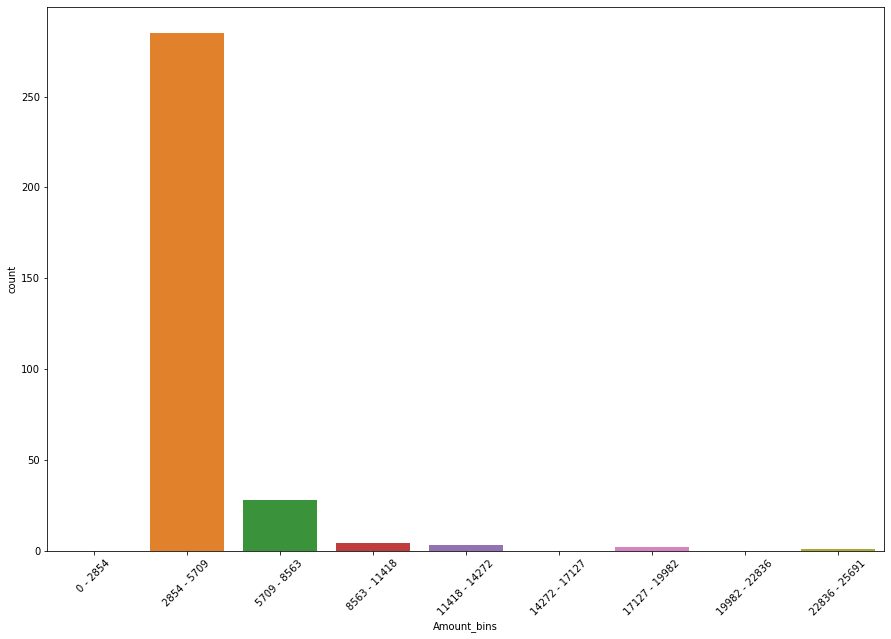

In [23]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount_bins', data=credit[credit['Amount_bins']!='0 - 2854'])
plt.xticks(rotation=45)

because the amount in first bins are high so to saw other bins amount we need to drop 1st one bin.

## Train the model

In [24]:
credit.dtypes

Time            float64
V1              float64
V2              float64
V3              float64
V4              float64
V5              float64
V6              float64
V7              float64
V8              float64
V9              float64
V10             float64
V11             float64
V12             float64
V13             float64
V14             float64
V15             float64
V16             float64
V17             float64
V18             float64
V19             float64
V20             float64
V21             float64
V22             float64
V23             float64
V24             float64
V25             float64
V26             float64
V27             float64
V28             float64
Amount          float64
Class             int64
Amount_bins    category
dtype: object

we can see the amount_bins feature is category type so we need to encode it in int.

In [25]:
enc = pd.get_dummies(data=credit, columns=['Amount_bins'])
credit = enc.copy()

In [26]:
from sklearn.model_selection import train_test_split

In [29]:
features=credit.drop(['Class'], axis=1)
label=credit['Class']

In [30]:
train_x, test_x, train_y, test_y=train_test_split(features, label, test_size=0.2, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lg=LogisticRegression()

In [41]:
lg.fit(train_x, train_y)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
lg_pred_train=lg.predict(train_x)
lg_pred_test=lg.predict(test_x)

Here in Classification, there are two type of Error Type-I and TypeII, so lets first decide which is imp for this Dataset:
1. Type-I Error or False Positives or Precision : False Positives are the ones which are actually not fraud but the prediction said that they are fraud.
2. Type-II Error or False Negatives or Recall: False Negatives are the ones which are actually fraud but the system said that they aren't.

Well, we can say that Type-II Error is more significant because we don't want system to have a fraudulent credit card because that can be more dangerous.

So, for Type-II Error, We can say that recall is the important metric.

In [46]:
from sklearn.metrics import  confusion_matrix, accuracy_score, precision_score, recall_score

In [49]:
print("Training Dataset: \n ",confusion_matrix(train_y, lg_pred_train))

Training Dataset: 
  [[227389     62]
 [   125    269]]


from this metrix we can analyze that in training dataset 62 are actual fraud but we predict them as normal customers while 125 are those who are actually not Fraud but we predicted as Fraud.

In [56]:
print("Test Dataset: \n ",confusion_matrix(test_y, lg_pred_test))

Test Dataset: 
  [[56846    18]
 [   39    59]]


From this metrix of Testing Dataset, we analyze that 18 are those who actually Fraud but we predicted them as normal customers and 39 are those who aare actually not Fraud but we predicted as Fraud.

In [61]:
lg_score_train=accuracy_score(train_y, lg_pred_train)
print("Training Accuracy: ",lg_score_train*100)

Training Accuracy:  99.91792666066843


In [59]:
lg_score_test=accuracy_score(test_y, lg_pred_test)
print("Testing Accuracy :",lg_score_test*100)

Testing Accuracy : 99.89993328885924


wow, 99% accuracy!!!
but Wait!!
we know that data is highly imbalanced, so we need to calculate Precision and Recall.

In [63]:
prec_lg_train=precision_score(train_y, lg_pred_train)
rec_lg_train=recall_score(train_y, lg_pred_train)
print("Precision score of training dataset: ", prec_lg_train)
print("Recall score of train dataset: ", rec_lg_train)

Precision score of training dataset:  0.8126888217522659
Recall score of train dataset:  0.682741116751269


Recall is very low as compared to precision. But in this dataset we need a high recall because of sensitivity.
we may try to increase the complexity of the model.
to check the overfitting, we need to find out score for test dataset

In [65]:
rec_lg_test=recall_score(test_y, lg_pred_test)
#print("Precision score of test dataset: ", prec_lg_test)
print("Recall score of test dataset: ", rec_lg_test)

Recall score of test dataset:  0.6020408163265306


the difference is small, around 0.08, So there is no chance of overfitting.
Lets find out the classification report

In [66]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(test_y, lg_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.60      0.67        98

    accuracy                           1.00     56962
   macro avg       0.88      0.80      0.84     56962
weighted avg       1.00      1.00      1.00     56962



Lets draw ROC Curve.
for ROC, we need the probability of Fraud happening

In [71]:
lg_pred_test_prob = lg.predict_proba(test_x)[:, 1]

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score

In [74]:
fpr, tpr, threshold = roc_curve(test_y, lg_pred_test_prob)

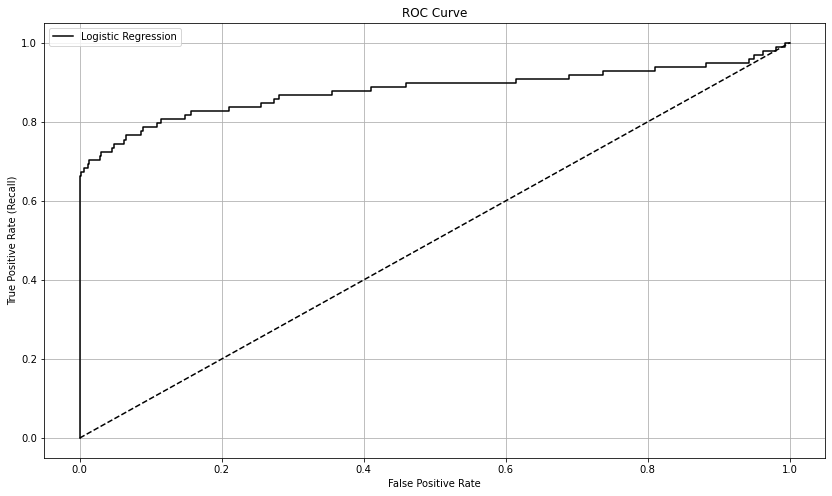

In [76]:
plt.plot(fpr, tpr,'k', label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.grid()
plt.title("ROC Curve")
plt.show()

In [79]:
lg_auc_score = roc_auc_score(test_y, lg_pred_test_prob)
lg_auc_score


0.8793052955566019

AUC score is quite good i.e. 0.879